<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Naive%20Bayes%20Spam%20Email%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
spam_df=pd.read_csv('https://raw.githubusercontent.com/nikhilkr29/Email-Spam-Classifier-using-Naive-Bayes/refs/heads/main/emails.csv')

In [7]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [9]:
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [10]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Visualize the Data


In [12]:
ham=spam_df[spam_df['spam']==0]

In [13]:
spam=spam_df[spam_df['spam']==1]

In [14]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [15]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [16]:
print('Spam Percentage =',(len(spam)/len(spam_df))*100,'%')

Spam Percentage = 23.88268156424581 %


In [17]:
print('Ham Percentage =',(len(ham)/len(spam_df))*100,'%')

Ham Percentage = 76.11731843575419 %


<Axes: ylabel='count'>

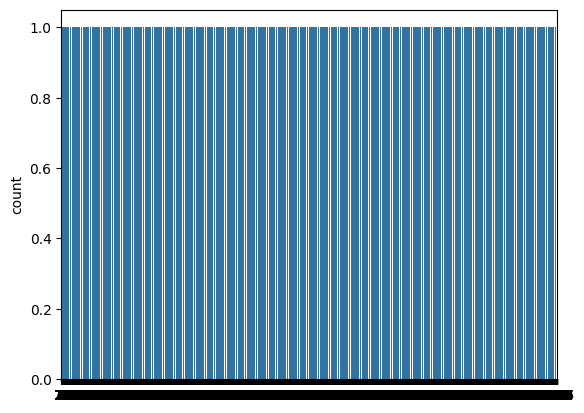

In [18]:
sns.countplot(spam_df['spam'],label='Spam vs Ham')

## Applying CountVectorizer to our Spam Ham Example

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(spam_df['text'])

In [21]:
#print(vectorizer.get_feature_names())

In [22]:
spamham_countVectorizer.shape

(5728, 37303)

## Dividing the Cell for Training and Testing Prior to Training

In [23]:
label=spam_df['spam']
X=spamham_countVectorizer
y=label

In [24]:
X.shape

(5728, 37303)

In [25]:
y.shape

(5728,)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

## Evaluating The Model

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

array([1, 0, 0, ..., 0, 1, 0])

In [31]:
cm=confusion_matrix(y_train,y_predict_train)

<Axes: >

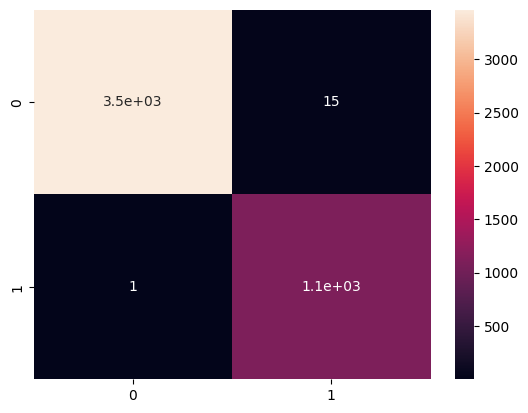

In [32]:
sns.heatmap(cm,annot=True)

In [33]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
cm=confusion_matrix(y_test,y_predict_test)


<Axes: >

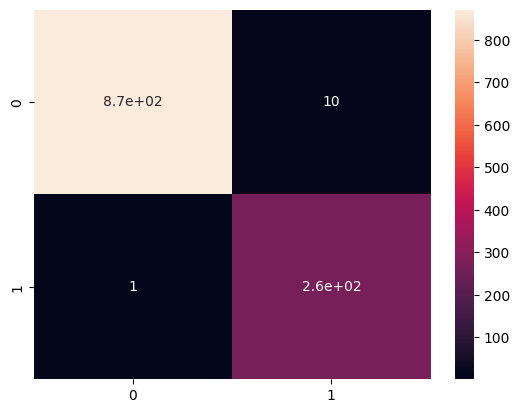

In [35]:
sns.heatmap(cm,annot=True)

In [36]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       881
           1       0.96      1.00      0.98       265

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

